# EDA and Preprocessing

Author: Preeya Sawadmanod 

---

In this notebook we load the clean data, analyze by plotting the number of tweets per city, and explore the top count of words within the data.


## Table of Contents 
---
- [Import Packages](#Import-Packages)
- [Tweets per city](#Tweets-per-city) 
- [Top word count](#Top-word-count)
- [Timestamp plot](#Timestamp-plot)
- [Coordinates](#Coordinates) 


### Import Packages 

In [2]:
#Import miscellaneous
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Import additional libraries 
import pandas    as pd
import numpy     as np
from datetime    import datetime

#Import Visualization libraties
import seaborn   as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import NLTK tools
from sklearn.feature_extraction.text    import CountVectorizer

### Tweets per city

In [3]:
#Reading in data frame 
df = pd.read_csv('../data/df_clean.csv')
df.head()

,id,location,text,timestamp,user,clean
0,59259141,Boston,Miles Davis to the rescue so,2012-11-11 23:52:07,diediesays,mile davis rescue
1,516097524,Boston,"@VINNYGUADAGNINO Happy birthday man , really l...",2012-11-11 23:06:45,abdallaxiv,happy birthday man really like effort help res...
2,17152345,Boston,How You Can Help Sandy's Victims http://bit.ly...,2012-11-11 22:15:20,02458,help sandy victim via
3,460583099,Boston,"When karma finally hits you in the face, ill b...",2012-11-11 19:37:42,andreap_426,karma finally hit face ill case need help
4,17246073,Boston,How You Can Help Sandy's Victims http://bit.ly...,2012-11-11 18:15:27,02461,help sandy victim via


In [4]:
#Looking in the cities 
df['location'].unique()

array(['Boston', 'Philadelphia', 'Providence', 'Washington DC', 'Buffalo',
       'Long Beach', 'Richmond', 'New York City'], dtype=object)

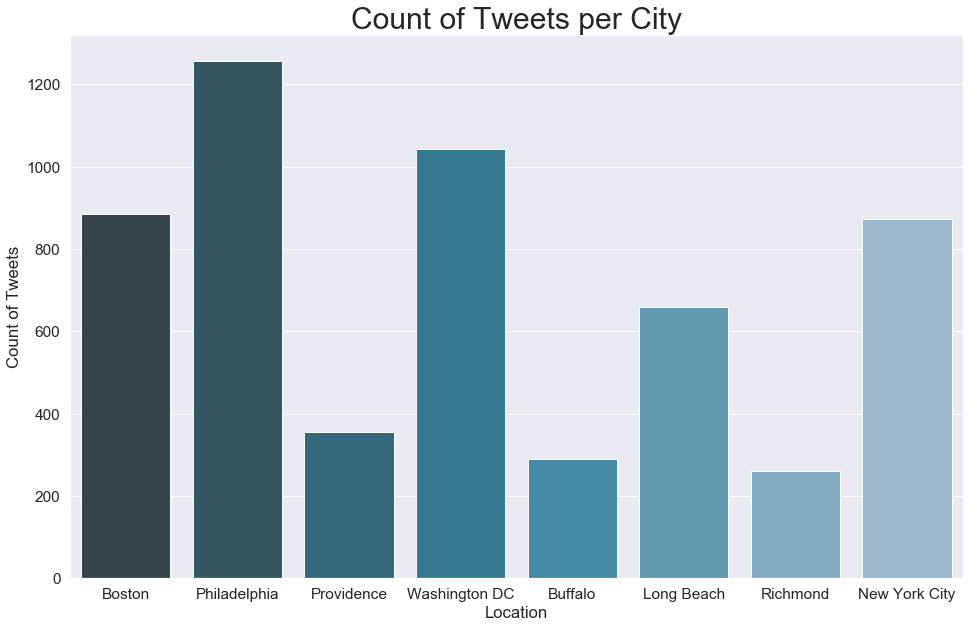

In [5]:
#Plotting count of tweets per city 
plt.figure(figsize=(16,10))
sns.set(font_scale=1.4)
ax = sns.countplot(x='location', data=df, palette= "PuBuGn_d")

#Set title and label 
ax.set_title("Count of Tweets per City", fontsize = 30)
ax.set_ylabel("Count of Tweets")
ax.set_xlabel("Location")

#Save figure
plt.savefig('../images/count_tweets_per_city.png');

**Observation**: Philadelphia and Washington DC have more than 1000 tweets, with Philadelphia having the highest amount of tweets. We are going to continue EDA, but this shows some limitations within our data, as we don't have enough data for some of the cities, such as Richmond and Buffalo. This indicates that people might have used different social media (Facebook or Instagram) to post about hurricane Sandy.

### Top word count

In [6]:
#Function for top count words
def get_top_n_words(corpus, n=20, ngram= (1,1)):
    
    #Instantiating and fitting Count Vectorizer 
    cvec = CountVectorizer(ngram_range=ngram).fit(corpus)
    
    #Transforming vector
    bag_of_words = cvec.transform(corpus)
    
    #Calculating the sum 
    sum_words = bag_of_words.sum(axis=0) 
    
    #Assigning sum count words
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    
    #Sorting word frequencies 
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    #Returning only top n numbers 
    return words_freq[:n]

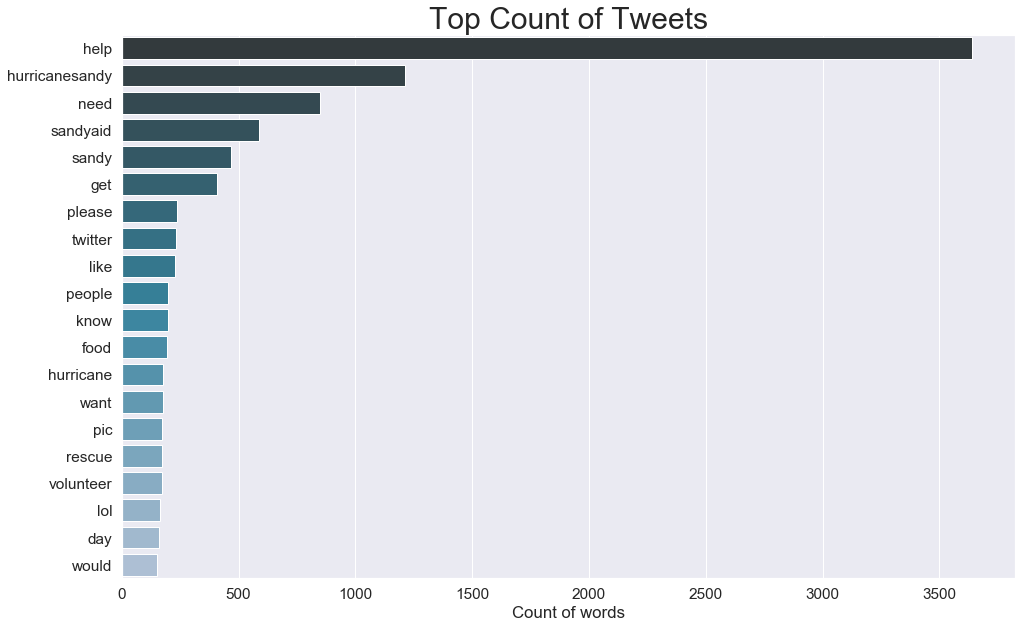

In [7]:
#Plotting top count of word (1 ngram)

#Making a new Data Frame to plot 
df_new = pd.DataFrame(get_top_n_words(df['clean'], n=20), columns = ['reviewtext', 'count'])
sns.set(font_scale=1.4)

#Plotting horizontal barplot 
plt.figure(figsize=(16,10))
ax = sns.barplot(x='count', y='reviewtext', data=df_new, palette= "PuBuGn_d" )

#Set title and label 
ax.set_title("Top Count of Tweets", fontsize = 30)
ax.set_ylabel("")
ax.set_xlabel("Count of words")

#Save figure
plt.savefig('../images/top_1gram.png');

**Observation**: Words such as "help", "hurricanesandy", and "rescue" have a high count in the tweets. 
This was expected as we used these words in our query search when we scraped for tweets. Next, we are going to look into 2 ngram words to further analyze our tweets.

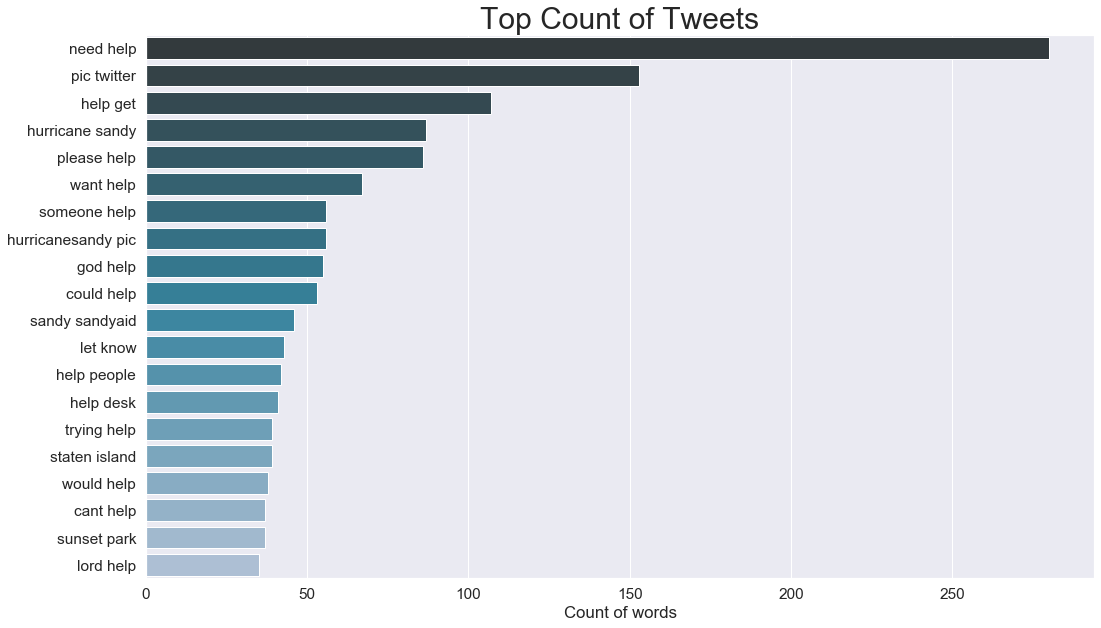

In [8]:
#Plotting top count of word (2 ngram)

#Making a new Data Frame to plot 
df_new = pd.DataFrame(get_top_n_words(df['clean'], ngram=(2,2)), columns = ['reviewtext', 'count'])
sns.set(font_scale=1.4)

#Plotting horizontal barplot 
plt.figure(figsize=(17,10))
ax = sns.barplot(x='count', y='reviewtext', data=df_new, palette= "PuBuGn_d" )

#Set title and label 
ax.set_title("Top Count of Tweets", fontsize = 30)
ax.set_ylabel("")
ax.set_xlabel("Count of words")

#Save figure
plt.savefig('../images/top_2gram.png');

**Observation**: This plot shows that we have a lot of word combinations with "help" in our tweets. When people tweet "help", there is a chance that they actually do not _need_ help, but rather they are tweeting about _offering_ to help others. This shows an additional potential limitation in our data.

### Timestamp plot

In [9]:
#Extrating the date only from timestamp
date  = [datetime.strptime(rows,'%Y-%m-%d %H:%M:%S').date() for rows in df['timestamp']]
df['date'] = date

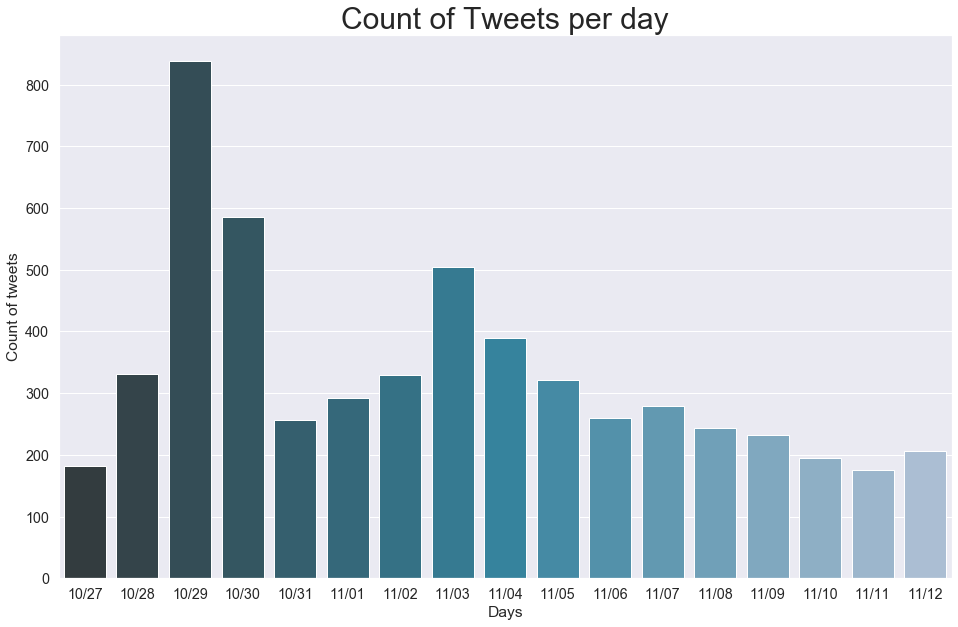

In [10]:
#plottig date
plt.figure(figsize=(16,10))
sns.set(font_scale=1.3)
ax = sns.barplot(x = df['date'].value_counts().sort_index().index, y = df['date'].value_counts().sort_index().values , data = df, palette= "PuBuGn_d")

#Set title, label and tickslabel 
ax.set_title("Count of Tweets per day", fontsize = 30)
ax.set_ylabel("Count of tweets")
ax.set_xlabel("Days")
ax.set_xticklabels(["10/27","10/28", "10/29", "10/30", "10/31", "11/01", "11/02", "11/03", "11/04", "11/05", "11/06", "11/07", "11/08", "11/09", "11/10", "11/11", "11/12"])

#Save figure
plt.savefig('../images/counts_tweets.png');

**Observation**: October 29th and October 30th have the most tweets. This matches the time frame when hurricane Sandy made landfall on the US East Coast. We are going to look into in October 29th specifically, the day of highest tweet count.

In [11]:
#Extracting tweets for Octobert 29th 
most_tweet_day = df[df['timestamp'].str.startswith('2012-10-29')].groupby(by='location').count()[['id']]
most_tweet_day.index

Index(['Boston', 'Buffalo', 'Long Beach', 'Philadelphia', 'Providence',
       'Richmond', 'Washington DC'],
      dtype='object', name='location')

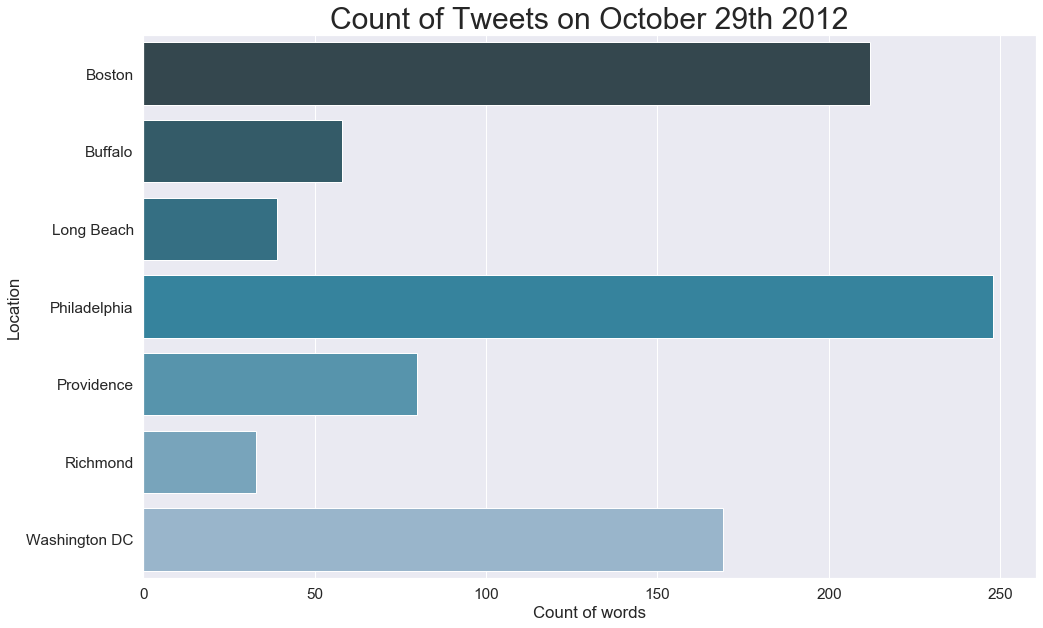

In [12]:
#Plotting tweets for October 29th
plt.figure(figsize=(16,10))
sns.set(font_scale=1.4)
ax = sns.barplot(x='id', y= most_tweet_day.index , data=most_tweet_day, palette= "PuBuGn_d")

#Set title and label
ax.set_title("Count of Tweets on October 29th 2012", fontsize = 30)
ax.set_ylabel("Location")
ax.set_xlabel("Count of words")

#Save figure
plt.savefig('../images/tweets_29th.png');

**Observation**: As expected we have the highest amount of tweets in Philadelphia on October 29th as we have collected the highest amount of tweets overall from that city. As we can see in the plot, Boston and Washington D.C. also have a high amount of tweets during October 29th. Additionally, we are missing data from New York City for that day.